In [8]:
import pandas as pd
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from scipy.special import hankel1,hankel2
from scipy.fftpack import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hankel2
from matplotlib import cm

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (5, 3)
plt.rcParams['font.size'] = 8
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.family'] = 'sans-serif'

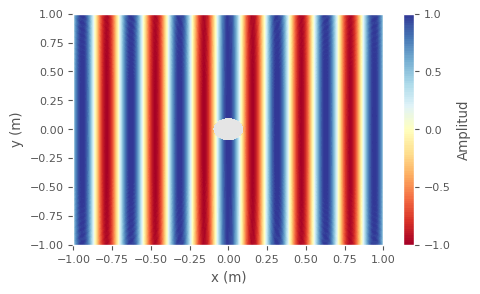

In [16]:


# Parámetros del problema
U0 = 1.0     # Amplitud de la onda incidente
a = 0.1      # Radio del agujero cilíndrico
c = 0.1      # Velocidad  (m/s)
omega = 2.0  # Frecuencia angular (rad/s)
k = omega / c # Número de onda

# Malla en coordenadas polares
r_max = 2.0
theta_max = 2 * np.pi
nr = 200  # Número de puntos en r
ntheta = 200  # Número de puntos en theta

r = np.linspace(a, r_max, nr)  # Evitar singularidad en r=0
theta = np.linspace(0, theta_max, ntheta)

dr = r[1] - r[0]  # Espaciado en r
dtheta = theta[1] - theta[0]  # Espaciado en theta

# Inicializar el campo de presión
u = np.zeros((nr, ntheta), dtype=complex)

# Campo incidente (onda plana)
for j in range(ntheta):
    u[:, j] = U0 * np.exp(1j * k * r * np.cos(theta[j]))

# # Iteración para resolver la ecuación de Helmholtz
for iteration in range(100):  # Número de iteraciones
    u_new = np.copy(u)

    for i in range(1, nr-1):
        for j in range(ntheta):
            # Ecuación de Helmholtz en diferencias finitas
            laplacian = (
                (u[i+1, j] - 2*u[i, j] + u[i-1, j]) / (dr**2) +
                (u[i, (j+1) % ntheta] - 2*u[i, j] + u[i, (j-1) % ntheta]) / (r[i]**2 * dtheta**2)
            )
            u_new[i, j] = u[i, j] - (1.0 / (k**2)) * laplacian

    # Aplicar condiciones de contorno
    # Condición de contorno en r=a: ∂u/∂r = 0
    u_new[0, :] = u_new[1, :]  # Aproximación de la derivada radial en el borde interior

    # Condiciones de contorno absorbentes en los otros bordes
    u_new[-1, :] = 0
    u_new[:, 0] = 0
    u_new[:, -1] = 0

    u = u_new

# Convertir la malla polar a coordenadas cartesianas para la visualización
R, Theta = np.meshgrid(r, theta)
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

# Graficar el campo total
#plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, np.real(u.T), 100, cmap='RdYlBu', vmin=-1, vmax=1)
plt.grid(False)
cbar = plt.colorbar(contour, label="Amplitud", extend='both')
cbar.set_ticks([-1, -0.5, 0, 0.5, 1])
plt.xlim(-1, 1)
plt.ylim(-1, 1)
#plt.title(r"Campo de presión usando diferencias finitas ($k \times a = {:.2f}$)".format(k * a))
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()